In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
test_df = pd.read_csv('loan_sanction_test.csv')

In [11]:
test_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [13]:
test_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [33]:
test_df.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [17]:
print("1. Tampilkan data loan oleh seorang laki-laki!")
test_df.loc[test_df['Gender'] == 'Male', ['Loan_ID','Gender','LoanAmount','Loan_Amount_Term']]

1. Tampilkan data loan oleh seorang laki-laki!


,Loan_ID,Gender,LoanAmount,Loan_Amount_Term
0,LP001015,Male,110.0,360.0
1,LP001022,Male,126.0,360.0
2,LP001031,Male,208.0,360.0
3,LP001035,Male,100.0,360.0
4,LP001051,Male,78.0,360.0
...,...,...,...,...
362,LP002971,Male,113.0,360.0
363,LP002975,Male,115.0,360.0
364,LP002980,Male,126.0,360.0
365,LP002986,Male,158.0,360.0


In [19]:
print("2. Urutkan data berdasar jumlah pinjaman! (cukup tampilkan hasil akhir dari dua perintah di atas)")
test_df.sort_values(by='LoanAmount', na_position='first')[['Loan_ID','LoanAmount']]

2. Urutkan data berdasar jumlah pinjaman! (cukup tampilkan hasil akhir dari dua perintah di atas)


,Loan_ID,LoanAmount
78,LP001415,NaN
101,LP001542,NaN
188,LP002057,NaN
247,LP002360,NaN
289,LP002593,NaN
...,...,...
81,LP001428,360.0
91,LP001483,390.0
194,LP002077,412.0
284,LP002570,460.0


In [20]:
print("Aggregating")

Aggregating


In [21]:
print("1. Hitung rata-rata pendapatan peminjam")
test_df['ApplicantIncome'].mean()

1. Hitung rata-rata pendapatan peminjam


4805.599455040872

In [39]:
print("2. Gender apa yang paling banyak mengajukan pinjaman, laki-laki atau perempuan?")
test_df['Gender'].value_counts()

2. Gender apa yang paling banyak mengajukan pinjaman, laki-laki atau perempuan?


Male      286
Female     70
Name: Gender, dtype: int64

In [23]:
print("3. Hitung rata-rata pinjaman yang diajukan untuk masing-masing area properti!")
test_df.groupby(['Property_Area']).mean()[['LoanAmount']]

3. Hitung rata-rata pinjaman yang diajukan untuk masing-masing area properti!


,LoanAmount
Property_Area,
Rural,138.181818
Semiurban,134.043860
Urban,136.224638


In [24]:
print("Membuat Grafik")

Membuat Grafik


In [26]:
income_data = test_df.groupby(['ApplicantIncome']).count()[['Loan_ID']].reset_index()

1. Buatlah histogram untuk penghasilan peminjam, beri judul grafik, dan label untuk tiap sumbu yang jelas!


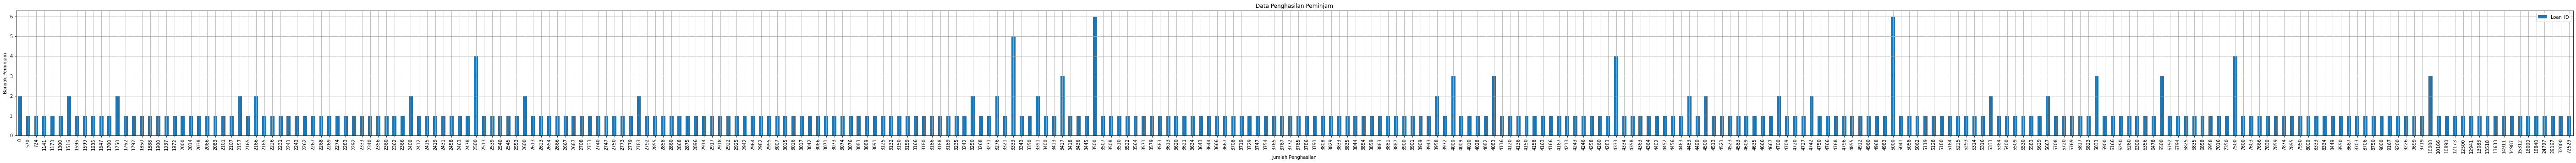

In [49]:
print("1. Buatlah histogram untuk penghasilan peminjam, beri judul grafik, dan label untuk tiap sumbu yang jelas!")
pd.DataFrame(income_data).plot(x='ApplicantIncome', y='Loan_ID', kind='bar',figsize=(100,5), grid=True, title='Data Penghasilan Peminjam', xlabel = 'Jumlah Penghasilan', ylabel='Banyak Peminjam')

2. Buatlah pie chart untuk tingkat pendidikan para peminjam!


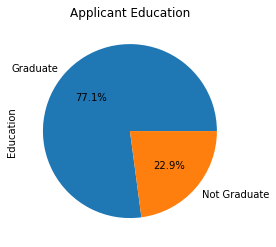

In [48]:
print("2. Buatlah pie chart untuk tingkat pendidikan para peminjam!")
pd.value_counts(test_df['Education']).plot(title='Applicant Education', kind='pie', autopct='%1.1f%%')